In [4]:
from urllib import request 
import logging
from pathlib import Path
import numpy as np
import re
# import MeCab
import random
from gensim import corpora, models
import pandas as pd
from tqdm import tqdm

In [5]:
import math

from wordcloud import WordCloud
from PIL import Image

import matplotlib
matplotlib.use('Agg') 
import matplotlib.pylab as plt
font = {'family': 'IPAGothic'}
jp_font = {'fontname':'IPAGothic'} # 日本語フォント設定を作成
matplotlib.rc('font', **font)
plt.rc('font', **font)
%matplotlib inline

In [26]:
from gensim import models, corpora, similarities

# corpus = corpora.MmCorpus("data/cop.mm")
# lda = models.ldamodel.LdaModel.load("model/lda1year_1month.model")
lda = models.ldamodel.LdaModel.load("../5year_model_dict/lda_final_5yeardic_2019.model")
# d = corpora.Dictionary.load_from_text("data/dict.txt")
# doc_index = similarities.docsim.MatrixSimilarity.load("data/sim")

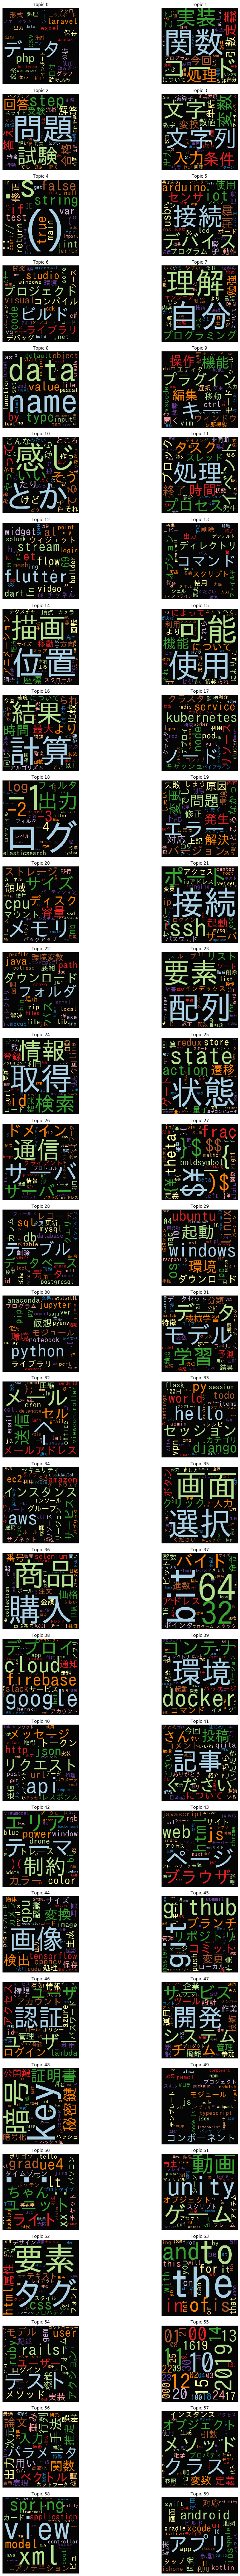

In [27]:
# WordCloud

fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda.num_topics/2), figsize=(16,100))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path="/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf", # desktop
#         font_path = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc", # mac
        background_color='black',
        color_func=color_func,
        max_words=4000,
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

# vis
plt.tight_layout()
# plt.show()

# save as png
plt.savefig('wordcloud_100_5years.png') 